# 1.4 Exemplos aplicados

 A seguir são apresentados alguns exemplos envolvendo a modelagem matemática de problemas físicos e sua respectiva resolução numéricas.


### EXEMPLO 1
A equação $f(x)=x^2-a=0$, com $a>0$, podemos utilizar o seguinte processo iterativo:

$$ x_{n+1}=\frac{1}{2} \left( x_n + \frac{a}{x_n} \right), \,\,\, n=1,2,...$$

A partir de uma aproximação inicial $x_0$, usamos essa expressão para gerar a sequência de soluções aproximadas $x_1$, $x_2$, ...

Assim, por exemplo, para calcular aproximações para $\sqrt{2}$, podemos fazer

$ x_0 = 1.5 $

$ x_1 = 1/2(1.5 + 2/1.5) = 1.4166666666666665 $

$x_2 = 1/2(1.4166666666666665 + 2/1.4166666666666665) = 1.4142156862745097 $

E assim por diante.

Em Python podemos fazer:

In [1]:
x = 1.0
x_ant = 0.0

err = 10.0

while err>0.0001:
    x = 0.5*(x + 2/x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print (x, err)

1.5 1.0
1.4166666666666665 0.058823529411764816
1.4142156862745097 0.001733102253032923
1.4142135623746899 1.5018239651360762e-06


Para obter $\sqrt{3}$ podemos fazer

In [2]:
x = 2.0

for i in range(6):
    x = 0.5*(x + 3/x)
    print (x)

1.75
1.7321428571428572
1.7320508100147274
1.7320508075688772
1.7320508075688772
1.7320508075688772


Para obter $\sqrt{9}$ podemos fazer

### EXEMPLO 
Uma esfera de madeira (densidade relativa $\mu_e =0,638$ e raio $r=10 cm$) é colocada a flutuar sobre a água (densidade relativa $\mu=1$), conforme figura. Qual é a altura $d$ da esfera que ficará submersa? 

![esfera.png](https://github.com/tiagoburiol/NUMETHODS/raw/master/1_INTRODUCAO_ERROS/imagens/esfera.png
)

### Solução###
Inicialmente, observemos que, pelo *Princípio de Arquimedes* o peso da esfera deve ser equilibrado com o peso do volume de água deslocada 

$$ M_e g = M_a g $$

$$ \mu_e \frac{4 \pi r^3}{3} = \mu_a \int_0^d \pi \left[r^2-(x-r)^2) \right]dx $$

$$ \mu_e \frac{4 \pi r^3}{3} = \mu_a \frac{\pi d^2 (3r-d)}{3}$$

$$ 4 \mu_e r^3 = \mu_a d^2 (3r-d)$$

substituindo os valores obtemos 

$$ d^3-30d^2+2552=0$$.

A solução analítica para esse problema pode ser encontrada mas é um tanto complicada. No entanto, com uma rotina podemos encontrar uma aproximação numericamente. 

Sabemos que a solução é um numero entre 0 e 20, então calculamos os valores da função $ f(d) = d^3-30d^2+2552 $ para valores entre 0 e 20 obtendo:


In [3]:
for d in range(20):
    print (d, d**3-30*d**2+2552)

0 2552
1 2523
2 2440
3 2309
4 2136
5 1927
6 1688
7 1425
8 1144
9 851
10 552
11 253
12 -40
13 -321
14 -584
15 -823
16 -1032
17 -1205
18 -1336
19 -1419


Observemos que a função moda de sinal entre $d=11$ e $d=12$, então podemos refinar a aproximação gerando alguns valores entre 11 e 12.

In [4]:
for x in range(10):
    d = 11+x*0.1
    print (d, d**3-30*d**2+2552)

11.0 253.0
11.1 223.33100000000013
11.2 193.72800000000007
11.3 164.19700000000012
11.4 134.7439999999997
11.5 105.375
11.6 76.09599999999955
11.7 46.912999999999556
11.8 17.831999999999425
11.9 -11.141000000000076


Observemos que a função muda de sinal entre $d=11.8$ e $d=11.9$, então podemos refinar a aproximação gerando alguns valores.

In [5]:
for x in range(10):
    d = 11.8+x*0.01
    print (d, d**3-30*d**2+2552)

11.8 17.831999999999425
11.81 14.929740999999922
11.82 12.028567999999723
11.83 9.128486999999495
11.84 6.229503999999906
11.850000000000001 3.3316249999998035
11.860000000000001 0.43485599999894475
11.870000000000001 -2.4607969999997295
11.88 -5.355328000000554
11.89 -8.248731000000134


Assim, podemos tomar como uma solução aproximada o ponto médio entre 11.86 e 11.87 que resolta em $d=11.865 cm$ com erro inferior a 0.005.

### EXEMPLO 

Um corpo em queda livre pode ser descrito pelo modelo matemático

$$ \frac{dv}{dt} = \frac{F}{m}$$

derivado da 2ª Lei de Newton $F=ma$. A força #F# atuante sobre o corpo composta pela soma de duas forças de mesma direção e sentidos opostos, a força gravitacional para baixo ($F_D$) e a força da resistência do ar para cima ($F_U$). Então

$$ \frac{dv}{dt} = \frac{(F_D+F_U)}{m}$$

como $F_D = mg$, com $m$ massa e $g$ aceleração da gravidade, e $F_U=-cv$, com $c$ sendo uma constante que depende das características do corpo em queda livre e $v$ a velocidade instantânea. Então

$$ \frac{dv}{dt} = \frac{mg-cv}{m}$$

ou

$$ \frac{dv}{dt} = g-\frac{c}{m}v$$

O modelo então consiste em uma equação diferencial cuja solução pode ser obtida analitivamente. Se o corpo em queda livre entrou em movimento a partir do repouso, ou seja, $v=0$ em $t=0$, a sulução analítica é dada por

$$ v(t) = gm(1-e^{(-c/m)t})$$

Se considerarmos $m=61,8kg$ entrando em movimento de queda livre a partir do repouso $v(t)=0$ em $t=0$ e o coeficiente de arrasto $c=12.5k g/s$, a solução fica

$$v(t)=\frac{9,81(68,1)}{12,5}(1-e^{(-12,5/68,1)t} = 53,44(1-e^{-0,18355t})$$

Assim, podemos obter o valor da velocidade para qualquer instante $t$. Tomando valores de $t$ de a cada 2 segundos, e calculando a velocidade a partir de $t=0$ obtemos


[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]
[  0.          16.41995476  27.79472025  35.67447948  41.13310679
  44.91451827  47.53405465  49.34871325  50.60580051  51.47663561
  52.07989823  52.4978026   52.78730183  52.98784963  53.12677718
  53.22301791  53.28968775  53.33587264  53.36786677  53.3900304
  53.40538404  53.41602013  53.42338817  53.42849232  53.43202816]


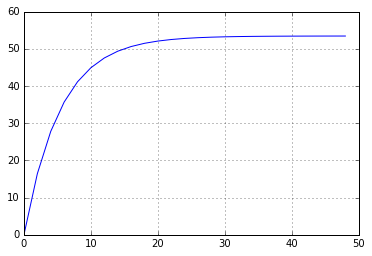

In [6]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,50, 2)
v = lambda t: 53.44*(1-np.exp(-0.18355*t))
print (t)
print (v(t))
plt.plot(t, v(t),"b-")
plt.grid()
plt.show()


Por outro lado, supondo que a solução analítica não fosse conhecida (ou que fosse impossível obtê-la), poderíamos encontrar uma solução aproximada numericamente. Para isso podemos aproximar a derivada $\frac{dv}{dt}$ por

$$ \frac{dv}{dt} \cong \frac{\Delta v}{\Delta t} = \frac{v(t_{i+1}-v(t_i))}{t_{i+1}-t_{i}} $$

então 

$$ \frac{v(t_{i+1}-v(t_i))}{t_{i+1}-t_{i}} = gm(1-e^{(-c/m)t})$$

que pode ser reescrita como

$$ v(t_{i+1}) = v(t_i) + \left[ g-\frac{c}{m} v(t_i) \right] (t_{i+1}-t_{i})$$

e ser usada para obter os valores de $v$ para cada instante $t_i$, $i=0,2,4,6,...$, a partir do instante inicial $t_0=0$.

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]
[0.0, 19.62, 32.037356828193836, 39.89621261813736, 44.87002590075947, 48.01791653924718, 50.01019387432531, 51.2710918646611, 52.069105130204015, 52.574161984020456, 52.89380883276478, 53.09611102337976, 53.22414662419483, 53.305179434695994, 53.356464517406714, 53.38892247724272, 53.40946488647814, 53.42246602947442, 53.43069435932962, 53.43590201008968, 53.439197894785096, 53.441283836493945, 53.442604013992494, 53.44343954483225, 53.44396834628884]


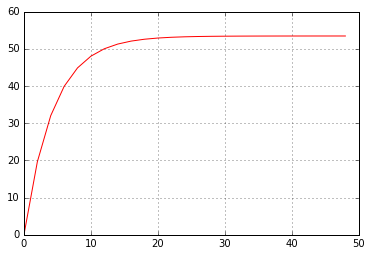

In [7]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

tempos = np.arange(0,50, 2)

v_aprox = [0.]
v_ant = 0.

for t in tempos:
    result = v_ant + (9.81 - (12.5/68.1)*v_ant)*2
    v_aprox.append(result)
    v_ant = result
    
del v_aprox[-1]
    
print (tempos)
print (v_aprox)

plt.plot(tempos, v_aprox, "r-")
plt.grid()
plt.show()

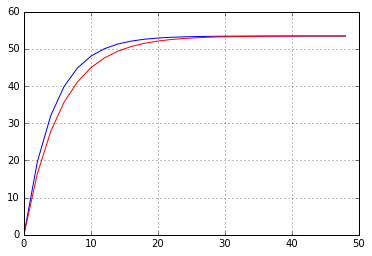

In [8]:
# Comparando os dois gráficos
% matplotlib inline
plt.plot(tempos, v_aprox, "b-", tempos, v(tempos), "r-")
plt.grid()

## Exemplo

Considere as expressões

$$ \frac{e^{1/x}}{1+e^{1/x}} \,\,\,\,\,\, e \,\,\,\,\,\,  \frac{1}{e^{-1/x}+1}$$
Verifique que, para $x>0$, são funções idênticas, então, use um programa em Python para testar o valor de cada uma para alguns valores de $x$ entre $0.1$ e $0.001$. Qual dessas expressões é mais adequada quando $x$ é um número pequeno? Explique.   

In [9]:
from math import exp
def f1(x): return exp(1./x)/(1+exp(1./x))
def f2(x): return 1./(exp(-1./x)+1)

lista = [0.1, 0.075, 0.05, 0.01, 0.005, 0.002, 0.0015, 0.0014, 0.001]

for x in lista:
    try:
        print ("f1(x)=", f1(x))
    except ArithmeticError as erro:
        print("f1(x)=", erro)
    try:
        print ("f2(x)=", f2(x))
    except ArithmeticError as erro:
        print("f1(x)=", erro)

f1(x)= 0.9999546021312976
f2(x)= 0.9999546021312976
f1(x)= 0.9999983804058308
f2(x)= 0.9999983804058309
f1(x)= 0.9999999979388464
f2(x)= 0.9999999979388463
f1(x)= 1.0
f2(x)= 1.0
f1(x)= 1.0
f2(x)= 1.0
f1(x)= 1.0
f2(x)= 1.0
f1(x)= 1.0
f2(x)= 1.0
f1(x)= math range error
f2(x)= 1.0
f1(x)= math range error
f2(x)= 1.0


**Comentário** <br>
Embora as duas expressões sejam idênticas, observando a saída dos códigos acima, percebe-se que para valores menores do que 0.0015 a primeira expressão resulta em um erro de _*Overflow*_ (*ArithmeticError = math range error*) enquanto que a segunda expressão não ocorre o erro. Assim, podemos dizer que a segunda expressão é mais adequada para valores de x pequenos.

## Exemplo
Apresente um programa em Python para obter aproximações para o valor da função
$f(x) = ln(1 + x)$ usando expansões em séries de Taylor em torno do ponto $x = 0$. Descubra quantos termos da série precisam ser retidos para calcular $ln(0.8)$ com erro absoluto inferior a 0.0001. 


**Resolução** <br>
A Série de Taylor em torno de x=0, também chamada de Série de McLaurin, para a função $ln(1+x)$ é dada por $\sum_{n=0}^{\infty}\frac{(-1)^nx^{n+1}}{n+1}$


In [10]:
from math import log
soma = 0.0
erro = 10.0
n = 0.0

while erro>0.0001:
    soma = soma + (-1.0)**n * (-0.2)**(n+1)/(n + 1)
    erro = abs(log(0.8)-soma)/abs(log(0.8))
    n = n + 1    
    print ("Resultado:", soma, ", Erro:", erro) 

Resultado: -0.2 , Erro: 0.1037159764550898
Resultado: -0.22000000000000003 , Erro: 0.014087574100598712
Resultado: -0.2226666666666667 , Erro: 0.002137120453333192
Resultado: -0.22306666666666672 , Erro: 0.00034455240624332016
Resultado: -0.22313066666666673 , Erro: 5.774151870891082e-05


**Comentário** <br>
Pelo resultado do código acima, os 5 primeiros termos da série são suficientes para a aproximar $ln(0.8)$, ou seja, $ln(1+x)$ com $x = -0.2$, com erro menor que 0.0001. 

## Exemplo

De acordo com o *princípio de Arquimedes*, a força de *flutuação* é igual ao peso do fluido deslocado pela parte submersa de um objeto. Para o tronco de cone mostrado abaixo, use o método da bisseção e mais algum método de sua escolha para determinar a altura $h_1$ da parte que está acima da água. Use os seguintes valores para seus cálculos: $r_1 = 0,5 m$, $r_2 = 1 m$, $h = 1 m$, $\rho_f=densidade do tronco=200 kg/m^3$ e $\rho_w=densidade da água=1000 kg/m^3$. O volume do trondo de cone é dado por: $$V=\frac{\pi h}{3}(r_1^2+r_2^2+r_1 r_2)$$

**Solução:** A equação a ser resolvida é 

$$200 \frac{\pi1.0}{3} (0.5^2+1.0^2+1.0 \times 0.5) = 1000\frac{\pi (1-h_1)}{3}((0.5+h_1/2)^2+1.0^2+1.0 \times (0.5+h_1/2))$$


In [11]:
import math
a = 0.1
b = 1.0
err = 10
x_ant = 0.0

f = lambda h: 1.75-5*(1-h)*(1.0+(0.5+h/2.)**2+(0.5+h/2.))

while err > 0.001:
    x = (a+b)/2.0
    if f(a)*f(x)<0:
        b = x
    else:
        a = x
    err = abs(x - x_ant)/abs(x)
    x_ant = x
    print ("| h1=%.10f"%x)

| h1=0.5500000000
| h1=0.7750000000
| h1=0.8875000000
| h1=0.8312500000
| h1=0.8593750000
| h1=0.8734375000
| h1=0.8804687500
| h1=0.8769531250
| h1=0.8751953125
| h1=0.8760742188
| h1=0.8756347656


In [12]:
import math

err = 1.0
x0 = 0.5
x1 = 1.0

f = lambda h: 1.75-5*(1-h)*(1.0+(0.5+h/2.)**2+(0.5+h/2.))

while err>0.001:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    err = abs (x-x1)/abs(x)
    
    x0 = x1
    x1 = x 

    print ("| h1=%.10f"%x)    

| h1=0.8486486486
| h1=0.8740418082
| h1=0.8758028171
| h1=0.8757774319


## Exemplo
O deslocamento de uma estrutura é definido pela seguinte equação para uma oscilação amortecida:

$$ y = 8 e^{-kt}cos(wt)$$

onde $k = 0,5$ e $w = 3$. Use os métodos de Ponto Fixo e Newton-Raphson para determinar a raiz com $\varepsilon = 0.001$. Comente os resultados obtidos.

_Solução_: A raiz de $$ y = 8 e^{-kt}cos(wt)$$ é a mesma raiz de  $$cos(wt)=0$$.

In [26]:
x = 0.5
phi  = lambda x: x+(1/3)*math.cos(3*x)

for i in range(3):
    x = phi(x)
    print (x)

0.5235790672225676
0.5235987755982874
0.5235987755982989


In [27]:
x = 0.5
f  = lambda x: math.cos(3*x)
flinha = lambda x: -3*math.sin(3*x)

for i in range(3):
    x = x - f(x)/flinha(x)
    print (x)

0.5236382814342175
0.5235987755981139
0.5235987755982989


## Exemplo
A figura abaixo mostra uma viga uniforme sujeita a uma carga distribuída de forma uniformemente crescente. A equação para a curva elástica resultante é

$$ y = \frac{w_0}{120 EIL} (-x^5+2L^2x^3-L^4x)$$

Use um método de sua escolha para determinar o ponto de deflexão máxima (isto é, o valor de $x$ para o qual $dy/dx=0$). A seguir, substitua esse valor na equação para determinar o valor da deflexão máxima. Use os seguintes valores dos parâmetros: $L = 450 cm$, $E = 50.000 kN/cm^2$, $I=30.000 cm^4$ e $w_0=1,75 kN/cm$. Comente seus resultados e estime o erro.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig01.png" width="400">
